<a href="https://colab.research.google.com/github/mykon23/AI-2020/blob/master/Activities/Activity13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Learning Curves

In [1]:
!wget -O Cy-Young.csv https://github.com/mykon23/AI-2020/blob/master/Data/Cy-Young.csv?raw=True

--2020-10-16 02:01:26--  https://github.com/mykon23/AI-2020/blob/master/Data/Cy-Young.csv?raw=True
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mykon23/AI-2020/raw/master/Data/Cy-Young.csv [following]
--2020-10-16 02:01:26--  https://github.com/mykon23/AI-2020/raw/master/Data/Cy-Young.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Cy-Young.csv [following]
--2020-10-16 02:01:27--  https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Cy-Young.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 20

In [2]:
import pandas as pd
data = pd.read_csv('Cy-Young.csv')
data.head()

,Rank,Name,Tm,Vote Pts,1st Place,Share,WAR,W,L,W-L,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,WHIP,ERA+
0,1,Justin Verlander\verlaju01,HOU,171,17,81,7.4,21,6,0.778,2.58,34,34,0,2,1,0,223.0,137,66,64,36,42,0,300,6,0,4,847,0.803,181
1,2,Gerrit Cole\colege01,HOU,159,13,76,6.6,20,5,0.800,2.50,33,33,0,0,0,0,212.1,142,66,59,29,48,0,326,3,3,4,817,0.895,187
2,3,Charlie Morton\mortoch02,TBR,75,0,36,4.9,16,6,0.727,3.05,33,33,0,0,0,0,194.2,154,71,66,15,57,0,240,12,1,5,790,1.084,146
3,4,Shane Bieber\biebesh01,CLE,64,0,30,4.6,15,8,0.652,3.28,34,33,1,3,2,0,214.1,186,86,78,31,40,1,259,6,1,6,859,1.054,145
4,5,Lance Lynn\lynnla01,TEX,18,0,9,7.5,16,11,0.593,3.67,33,33,0,0,0,0,208.1,195,89,85,21,59,0,246,8,0,18,875,1.219,141


In [3]:
##Set the features of interest
features = ['WAR', 'ERA', 'W', 'IP', 'BB', 'SO', 'WHIP']
output = ['Vote Pts']

In [4]:
import random
import numpy as np

work_data = data[features + output].to_numpy()
np.random.shuffle(work_data)

Define Utilities

In [5]:
import matplotlib.pyplot as plt
import numpy as np

##Define class to split data and normalize inputs
class DevSetUtil:
  @staticmethod
  def get_development_sets(dev_set, val_percent):
    ##Define the split point for the training set and the validation set
    split_pt = int(val_percent * len(dev_set))

    ##Set the data as two new tensors to permit normlalization
    TRAIN = np.array(dev_set[split_pt:])
    VALID = np.array(dev_set[:split_pt])

    XTRAIN = TRAIN[:, :-1]
    XVALID = VALID[:, :-1]

    ##Normalize the training set
    mean = XTRAIN.mean(axis = 0)
    XTRAIN -= mean
    std = XTRAIN.std(axis = 0)
    XTRAIN /= std

    ##Normalize the validation set
    XVALID -= mean
    XVALID /= std

    return (TRAIN, VALID)

class PlotUtil:
  @staticmethod
  def get_learning_curve(history):
    f, ax = plt.subplots()
    ax.plot(history.history['loss'], '-', label = 'Training', color = 'blue')
    ax.plot(history.history['val_loss'], '--', label = 'Validation', color = 'orange')
    ax.set_ylabel('Loss')
    ax.set_xlabel('epoch')
    ax.legend()
    return (f, ax)

Define Neural Networks

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

DEFAULT_EPOCHS = 256
DEFAULT_BATCH = 64

class ModelUtil:
  @staticmethod
  def get_network(x_dim):
    model = Sequential()
    model.add( Dense(6, input_dim = x_dim, activation = 'relu'))
    model.add( Dense(3, activation='relu'))
    model.add( Dense(1, activation = 'relu'))
    return model
  @staticmethod
  def get_underfit_model(x_dim):
    model = Sequential()
    model.add( Dense(1, input_dim = x_dim, activation = 'relu'))
    model.add( Dense(1, activation = 'relu'))
    return model
  @staticmethod
  def get_overfit_model(x_dim):
    model = Sequential()
    model.add( Dense(18, input_dim = x_dim, activation = 'relu'))
    model.add( Dense(9, input_dim = x_dim, activation = 'relu'))
    model.add( Dense(3, activation='relu'))
    model.add( Dense(2, activation = 'relu'))
    model.add( Dense(1, activation = 'relu'))
    return model

##Validation Set Too Small

In [7]:
##Set 97% Training and 3% Validation
dev_set = DevSetUtil.get_development_sets(work_data, 0.02)

In [8]:
xtrain = dev_set[0][:, :-1]
ytrain = dev_set[0][:, -1]
valid = (dev_set[1][:, :-1], dev_set[1][:,-1])

In [9]:
##Get the Network
model = ModelUtil.get_network(len(features))
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'])

In [10]:
##Train the Model
history = model.fit( xtrain, ytrain,
                    validation_data = valid,
                    epochs = DEFAULT_EPOCHS,
                    batch_size = DEFAULT_BATCH,
                    verbose = 0 )

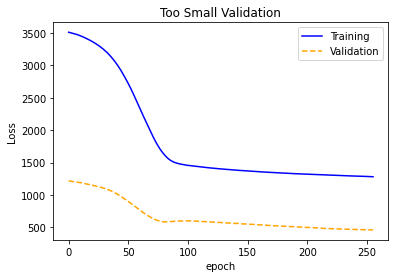

In [11]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history)
figs[1].set_title('Too Small Validation')
figs[0].show()

The learning curves indicate that the validation set is easier to predict than the training set as the two losses are disjoint.  The contents of the validation set do not represent those of the training set and cannot be utilized as a viable metric for evaluating the model's performance.  Machine learning relies on IID and therefore a validation set that better represents the training set is required to evaluate the model.

##Training Set Too Small

In [43]:
##Set 10% Training and 90% Validation
dev_set = DevSetUtil.get_development_sets(work_data, 0.90)

In [44]:
xtrain = dev_set[0][:, :-1]
ytrain = dev_set[0][:, -1]
valid = (dev_set[1][:, :-1], dev_set[1][:,-1])

In [48]:
##Get the Network
model = ModelUtil.get_network(len(features))
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'])

In [49]:
##Train the Model
history = model.fit( xtrain, ytrain,
                    validation_data = valid,
                    epochs = DEFAULT_EPOCHS * 2,
                    batch_size = DEFAULT_BATCH,
                    verbose = 0 )

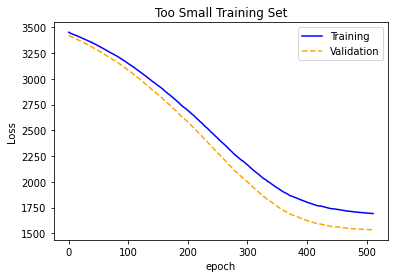

In [50]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history)
figs[1].set_title('Too Small Training Set')
figs[0].show()

A discrepency is present between the validation loss and the training loss if the model has too few samples for training.  The model appears to learn based on the slow decrease of the training loss.  The training set has too few samples for the model to learn meaningful information from the data.  The validation loss and training loss are disjoint suggesting that performance may or may not improve with additional training.  The disconnect between the losses may also be attributed to the normalization parameters acquired from the reduced training set.

##Good Learning Curve

In [17]:
##Set 75% Training and 25% Validation
dev_set = DevSetUtil.get_development_sets(work_data, 0.25)

In [18]:
xtrain = dev_set[0][:, :-1]
ytrain = dev_set[0][:, -1]
valid = (dev_set[1][:, :-1], dev_set[1][:,-1])

In [19]:
##Get the Network
model = ModelUtil.get_network(len(features))
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'])

In [20]:
##Train the Model
history = model.fit( xtrain, ytrain,
                    validation_data = valid,
                    epochs = DEFAULT_EPOCHS,
                    batch_size = DEFAULT_BATCH,
                    verbose = 0 )

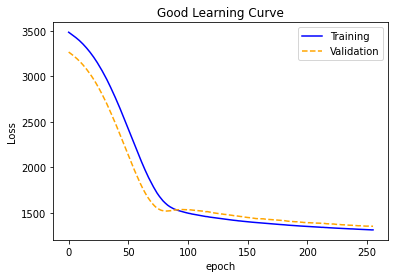

In [21]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history)
figs[1].set_title('Good Learning Curve')
figs[0].show()

A good learning curve is produced by utilizing 75% of the data for training and the remaining 25% for validation.  The training loss and validation loss improve throughout the training such that both losses converge to a similar loss.  The size of the training set permit the model to learn meaningful information from the data.  The model is capable of generalizing the data as the loss is similar between the training set and the validation set.

##Overfitting Model

In [22]:
##Set 75% Training and 25% Validation
dev_set = DevSetUtil.get_development_sets(work_data, 0.25)

In [23]:
xtrain = dev_set[0][:, :-1]
ytrain = dev_set[0][:, -1]
valid = (dev_set[1][:, :-1], dev_set[1][:,-1])

In [24]:
##Get the Network
model = ModelUtil.get_overfit_model(len(features))
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'])

In [25]:
##Train the Model
history = model.fit( xtrain, ytrain,
                    validation_data = valid,
                    epochs = DEFAULT_EPOCHS * 2,
                    batch_size = DEFAULT_BATCH,
                    verbose = 0 )

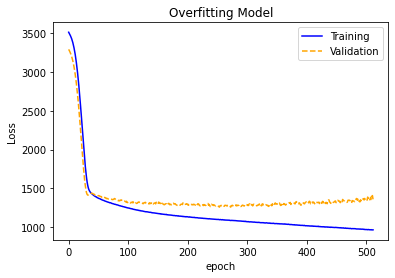

In [26]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history)
figs[1].set_title('Overfitting Model')
figs[0].show()

A divergence between the validation loss and training loss is present within the learning curves of the overfitted model.  The validation loss and training loss were initially aligned, but a diverged prior to the 100th epoch.  The divergence continues to increase indicating that the model's objective to minimize the training loss led to the model memorizing the outputs instead of learning from the data.  The model fails to generalize the data as the training loss and validation loss are not comparable.

##Needs Further Training

In [27]:
##Set 75% Training and 25% Validation
dev_set = DevSetUtil.get_development_sets(work_data, 0.25)

In [28]:
xtrain = dev_set[0][:, :-1]
ytrain = dev_set[0][:, -1]
valid = (dev_set[1][:, :-1], dev_set[1][:,-1])

In [29]:
##Get the Network
model = ModelUtil.get_network(len(features))
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'])

In [30]:
##Train the Model
history = model.fit( xtrain, ytrain,
                    validation_data = valid,
                    epochs = DEFAULT_EPOCHS//4,
                    batch_size = DEFAULT_BATCH,
                    verbose = 0 )

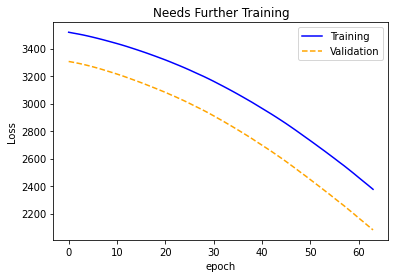

In [31]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history)
figs[1].set_title('Needs Further Training')
figs[0].show()

The learning curves indicate that the training loss and validation loss will improve with additional training.  Both the training loss and validation loss trend downwards to potentially converge a common loss.  The loss between the training set and the validatioin set converge around the 100th epoch based on the good learning curve.

##Underfitting Model

In [32]:
##Set 75% Training and 25% Validation
dev_set = DevSetUtil.get_development_sets(work_data, 0.25)

In [33]:
xtrain = dev_set[0][:, :-1]
ytrain = dev_set[0][:, -1]
valid = (dev_set[1][:, :-1], dev_set[1][:,-1])

In [40]:
##Get the Network
model = ModelUtil.get_underfit_model(len(features))
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'])

In [41]:
##Train the Model
history = model.fit( xtrain, ytrain,
                    validation_data = valid,
                    epochs = DEFAULT_EPOCHS,
                    batch_size = DEFAULT_BATCH,
                    verbose = 0 )

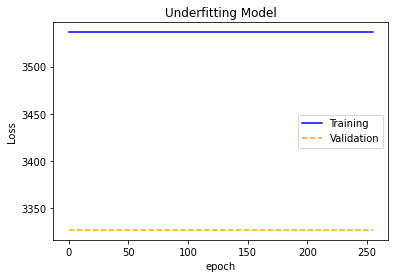

In [42]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history)
figs[1].set_title('Underfitting Model')
figs[0].show()

The underfitting model lacks the capacity to learn from the data and thus yields constant loss for both the training and validation sets.  The underfitting model does not appear to perform better than a linear regression model.  The lower validation loss is attributed to the validation set being easier to predict than those of the training set.